In [1]:
import pandas as pd
import re
import sklearn.neighbors as nb
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder as LB
import sklearn.model_selection as cv
import sklearn
from sklearn import preprocessing
import random as rand
import numpy as np
import math

# Loading data 

In [2]:
data = pd.read_csv('games_clean.csv')
data

,Presence,Memory,ReleaseDate,OriginalCost,DiscountedCost,Achievements,Storage,RatingsBreakdown-Recommended,RatingsBreakdown-Meh,RatingsBreakdown-Exceptional,...,Wargame,Warhammer 40K,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,41.0,2000.0,2017.0,5.99,0.0,0.0,450.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,25415.0,1000.0,2012.0,3.99,0.0,44.0,120.0,4.0,9.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,1421.0,4000.0,2016.0,1.99,0.0,0.0,2000.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,257.0,4000.0,2013.0,9.99,0.0,20.0,12000.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,250.0,256.0,2017.0,4.99,0.0,0.0,312.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,259.0,1024.0,2017.0,0.00,0.0,100.0,200.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2196,1797.0,8000.0,2017.0,5.99,0.0,13.0,1000.0,32.0,8.0,4.0,...,False,False,False,False,False,False,False,False,False,False
2197,133.0,1000.0,2018.0,6.99,0.0,0.0,1000.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2198,12.0,8000.0,2018.0,0.00,0.0,0.0,4000.0,3.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [3]:
LE = LB()
class_names = data['Metacritic'].unique()
data.loc[:, 'Metacritic'] = LE.fit_transform(data['Metacritic'])

In [4]:
# Let's separate Data from labels

X = data.drop(['Metacritic'],axis=1)   # Data
y = data['Metacritic']

print(X.shape)
print(y.shape)

(2200, 439)
(2200,)


# KNN without scaled data

In [5]:
# Let's do a simple cross-validation: split data into training and test sets (test 30% of data)
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=1)

# Create a kNN classifier object
knc = nb.KNeighborsClassifier()

# Train the classifier
knc.fit(X_train, y_train)

# Obtain accuracy score of learned classifier on test data
print(knc.score(X_test, y_test))

0.2878787878787879


In [6]:
# More information with confussion matrix
from sklearn.metrics import confusion_matrix

y_pred = knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[64 47 35 21]
 [55 39 39 23]
 [57 42 48 26]
 [37 35 53 39]]


In [7]:
# Obtain Recall, Precision and F-Measure for each class
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.38      0.34       167
           1       0.24      0.25      0.24       156
           2       0.27      0.28      0.28       173
           3       0.36      0.24      0.29       164

    accuracy                           0.29       660
   macro avg       0.29      0.29      0.29       660
weighted avg       0.29      0.29      0.29       660



# Normalize data

In [8]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X), columns = X.columns)
X_scaled

,Presence,Memory,ReleaseDate,OriginalCost,DiscountedCost,Achievements,Storage,RatingsBreakdown-Recommended,RatingsBreakdown-Meh,RatingsBreakdown-Exceptional,...,Wargame,Warhammer 40K,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,0.000051,0.000336,0.823529,0.133111,0.0,0.000000,0.008785,0.005618,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.031815,0.000168,0.529412,0.088667,0.0,0.063309,0.002314,0.016854,0.121212,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001779,0.000672,0.764706,0.044222,0.0,0.000000,0.039178,0.005618,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000322,0.000672,0.588235,0.222000,0.0,0.028777,0.235264,0.005618,0.015152,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000313,0.000043,0.823529,0.110889,0.0,0.000000,0.006079,0.005618,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0.000324,0.000172,0.823529,0.000000,0.0,0.143885,0.003883,0.011236,0.030303,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2196,0.002250,0.001344,0.823529,0.133111,0.0,0.018705,0.019569,0.174157,0.106061,0.015152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2197,0.000166,0.000168,0.882353,0.155333,0.0,0.000000,0.019569,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2198,0.000015,0.001344,0.882353,0.000000,0.0,0.000000,0.078395,0.011236,0.015152,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# KNN with scaled data

In [9]:
# Let's do a simple cross-validation: split data into training and test sets (test 30% of data)
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X_scaled, y, test_size=.3, random_state=1)

# Create a kNN classifier object
knc = nb.KNeighborsClassifier()

# Train the classifier
knc.fit(X_train, y_train)

# Obtain accuracy score of learned classifier on test data
print(knc.score(X_test, y_test))

0.3287878787878788


In [10]:
# More information with confussion matrix
from sklearn.metrics import confusion_matrix

y_pred = knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[77 31 23 36]
 [53 45 30 28]
 [68 37 44 24]
 [47 37 29 51]]


In [11]:
# Obtain Recall, Precision and F-Measure for each class
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.46      0.37       167
           1       0.30      0.29      0.29       156
           2       0.35      0.25      0.29       173
           3       0.37      0.31      0.34       164

    accuracy                           0.33       660
   macro avg       0.33      0.33      0.32       660
weighted avg       0.33      0.33      0.32       660



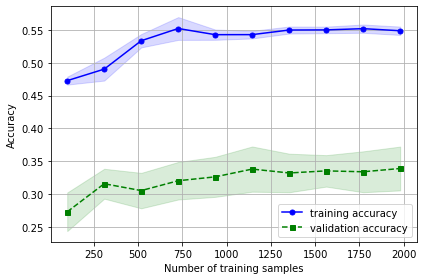

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=nb.KNeighborsClassifier(n_neighbors=5),
                               X=X_scaled,
                               y=y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

# Selecting the best K and best distance method

In [13]:
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score

# Results with different parameters: k
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1), X=X_scaled, y=y,  cv=10)  
print("Accuracy 1 neighbour and uniform weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3), X=X_scaled, y=y,  cv=10)  
print("Accuracy 3 neighbour and uniform weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5), X=X_scaled, y=y,  cv=10)  
print("Accuracy 5 neighbour and uniform weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7), X=X_scaled, y=y,  cv=10)  
print("Accuracy 7 neighbour and uniform weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9), X=X_scaled, y=y,  cv=10) 
print("Accuracy 9 neighbour and uniform weighting:", np.mean(cv_scores))

Accuracy 1 neighbour and uniform weighting: 0.33999999999999997
Accuracy 3 neighbour and uniform weighting: 0.34500000000000003
Accuracy 5 neighbour and uniform weighting: 0.3390909090909091
Accuracy 7 neighbour and uniform weighting: 0.35045454545454546
Accuracy 9 neighbour and uniform weighting: 0.3472727272727273


In [14]:
# Results with different parameters: k and distance weighting
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1,weights='distance'), X=X_scaled, y=y,  cv=10)  
print("Accuracy 1 neighbour and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3,weights='distance'), X=X_scaled, y=y,  cv=10)  
print("Accuracy 3 neighbour and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5,weights='distance'), X=X_scaled, y=y,  cv=10)  
print("Accuracy 5 neighbour and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7,weights='distance'), X=X_scaled, y=y,  cv=10)  
print("Accuracy 7 neighbour and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9,weights='distance'), X=X_scaled, y=y,  cv=10)  
print("Accuracy 9 neighbour and distance weighting:", np.mean(cv_scores))

Accuracy 1 neighbour and distance weighting: 0.33999999999999997
Accuracy 3 neighbour and distance weighting: 0.3545454545454546
Accuracy 5 neighbour and distance weighting: 0.3445454545454546
Accuracy 7 neighbour and distance weighting: 0.3581818181818182
Accuracy 9 neighbour and distance weighting: 0.35590909090909095


# Authomatically find best parameters

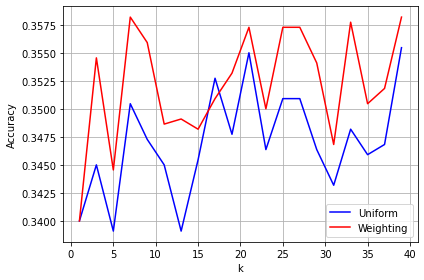

In [24]:
lr = []
for ki in range(1,40,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_scaled, y=y, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,40,2),lr,'b',label='Uniform')

lr = []
for ki in range(1,40,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_scaled, y=y, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,40,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

# Grid Search method

In [25]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,60,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_scaled, y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 41, 'weights': 'distance'} Accuracy= 0.3590909090909091


# Feature Selection

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_scaled, y)
thresholds=clf.feature_importances_
print(thresholds.min())
print(thresholds.max())
thresholds

0.0
0.07992331858191319


array([5.58127165e-02, 3.67362430e-02, 7.99233186e-02, 4.72391375e-02,
       2.21610765e-03, 2.68129664e-02, 4.80257673e-02, 2.94194805e-02,
       2.27347302e-02, 2.26677279e-02, 2.54006638e-02, 2.37612300e-02,
       2.13298180e-02, 2.36396799e-04, 7.36339460e-04, 3.89147924e-04,
       5.03187625e-04, 6.53895900e-03, 4.15435159e-04, 1.00370811e-03,
       1.09353643e-03, 6.11829066e-05, 1.91817789e-03, 1.26939348e-04,
       1.38210954e-03, 6.98323185e-04, 3.68104746e-04, 1.08398801e-04,
       1.15640225e-03, 1.13472050e-02, 1.16266244e-03, 1.07115560e-03,
       1.19115735e-03, 1.19928897e-03, 1.26674974e-02, 1.00725424e-03,
       7.50866498e-04, 4.66537956e-04, 3.89810157e-05, 1.19501195e-04,
       4.72017892e-03, 1.01674029e-03, 4.18092876e-03, 5.16002430e-05,
       9.05117824e-04, 1.08709753e-04, 1.50615372e-04, 1.31562061e-04,
       4.62688613e-03, 3.70624293e-05, 1.28729409e-04, 1.07617454e-03,
       1.06761300e-03, 2.82238551e-04, 1.06907201e-04, 2.87986264e-04,
      

In [18]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True, threshold=(np.array(thresholds).mean())) #por que random forest???
X_new = model.transform(X_scaled)
print(X_new.shape)

print(np.mean(cross_val_score(nb.KNeighborsClassifier(n_neighbors=13, weights='uniform'), X=X_scaled, y=y, cv=10, scoring='accuracy')))
print(np.mean(cross_val_score(nb.KNeighborsClassifier(n_neighbors=13, weights='uniform'), X=X_new, y=y, cv=10, scoring='accuracy')))

(2200, 86)
0.3390909090909091
0.36318181818181816


In [19]:
N = 92 #numero de variables que cogemos
ad = [(v,i) for (i,v) in enumerate(thresholds)]
ad_ind = sorted(ad)[:-N:-1]
for (_,i) in ad_ind:
    print(data.columns[i])

ReleaseDate
Presence
Storage
OriginalCost
Memory
RatingsBreakdown-Recommended
Achievements
RatingsBreakdown-Skip
Metacritic
RatingsBreakdown-Meh
RatingsBreakdown-Exceptional
Controller
Cartoony
Addictive
Abstract
Silent Protagonist
Story Rich
Runner
Dystopian
Simulation
Gaming
PvP
Free to Play
JRPG
Psychological Horror
2.5D
Pixel Graphics
Utilities
Foreign
Isometric
Split Screen
Mouse only
Villain Protagonist
Pirates
America
Grand Strategy
Asynchronous Multiplayer
Hockey
Detective
Platform-Xbox
RTS
Steampunk
Kickstarter
Arabic
Resource Management
French
Family Friendly
Platform-Mobile
Golf
Finnish
Platformer
Fast-Paced
Point & Click
Faith
Clicker
Platform-PC
Hex Grid
Cult Classic
Combat Racing
Shoot 'Em Up
Surreal
Platform-Sega
Satire
Platform-Nintendo
Violent
FMV
Nostalgia
Pool
RPG
Trivia
Realistic
Psychological
Local Co-Op
Sequel
Experimental
Dungeons & Dragons
Sailing
Philosophical
Class-Based
Remake
Martial Arts
Farming Sim
Online Co-Op
Turkish
Robots
Music-Based Procedural Generat

In [20]:
from sklearn.model_selection import GridSearchCV
l=[]
lparval=[]
for threshold in set(sorted(thresholds)):
    model = SelectFromModel(clf, prefit=True, threshold=threshold)
    X_new = model.transform(X_train)
    params = {'n_neighbors':list(range(9,19,2)), 'weights':('distance','uniform')}
    knc = nb.KNeighborsClassifier()
    clf2 = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
    clf2.fit(X_new, y_train)
    parval=clf2.best_params_
    acc = clf2.best_score_
    #clf3 = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
    #acc = np.mean(cross_val_score(clf3, X=X_new, y=y_train, cv=10, scoring='accuracy'))
    l.append(acc)
    lparval.append(parval)

KeyboardInterrupt: 

In [ ]:
plt.scatter(sorted(thresholds),439)
plt.show()

print('Best threshold: ',thresholds[np.argmax(l)])
print("Best params for this threshold=",parval)

In [ ]:
parval=lparval[np.argmax(l)]
model = SelectFromModel(clf, prefit=True, threshold=thresholds[np.argmax(l)])
X_new = model.transform(X_test)
print(X_new.shape)
clf_new = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
print('Original: ', np.mean(cross_val_score(nb.KNeighborsClassifier(n_neighbors=15, weights='distance'), X=X_test, y=y_test, cv=10, scoring='accuracy')))
print('With FS: ', np.mean(cross_val_score(clf_new, X=X_new, y=y_test, cv=10, scoring='accuracy')))

In [ ]:
parval=lparval[np.argmax(l)]
model = SelectFromModel(clf, prefit=True, threshold=thresholds[np.argmax(l)])
X_new = model.transform(X_scaled)
clf_new = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
print('Original: ', np.mean(cross_val_score(nb.KNeighborsClassifier(n_neighbors=15, weights='distance'), X=X_scaled, y=y, cv=10, scoring='accuracy')))
print('With FS: ', np.mean(cross_val_score(clf_new, X=X_new, y=y, cv=10, scoring='accuracy')))